In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

In [40]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

In [41]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [42]:
from sklearn.decomposition import PCA

In [43]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import shap

In [44]:
path = '/home/aurore/Documents/HoursDoc/Formations/DESU_DataScience/MachineLearning/Project/little_project/data/raw/'

raw_df = pd.read_csv(path + 'weatherAUS.csv')
#raw_df.drop("Id",axis='columns',inplace=True) # inplace = True -> met à jour, pas besoin de faire raw_df = raw_df.drop(..)
print(raw_df.shape)
raw_df.head()

(145460, 23)


Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

# Pas de doublons  
pass

In [45]:
dup = raw_df.drop_duplicates()
dup.shape

(145460, 23)

# Valeurs nulles

pas de nan pass

In [46]:
# copie du dataframe
df = raw_df.copy()
var_nan = df.isnull().sum() * 100 / len(df)
var_nan.sort_values(ascending=False, inplace=True)
var_nan

Sunshine         48.009762
Evaporation      43.166506
Cloud3pm         40.807095
Cloud9am         38.421559
Pressure9am      10.356799
Pressure3pm      10.331363
WindDir9am        7.263853
WindGustDir       7.098859
WindGustSpeed     7.055548
Humidity3pm       3.098446
WindDir3pm        2.906641
Temp3pm           2.481094
RainTomorrow      2.245978
Rainfall          2.241853
RainToday         2.241853
WindSpeed3pm      2.105046
Humidity9am       1.824557
WindSpeed9am      1.214767
Temp9am           1.214767
MinTemp           1.020899
MaxTemp           0.866905
Date              0.000000
Location          0.000000
dtype: float64

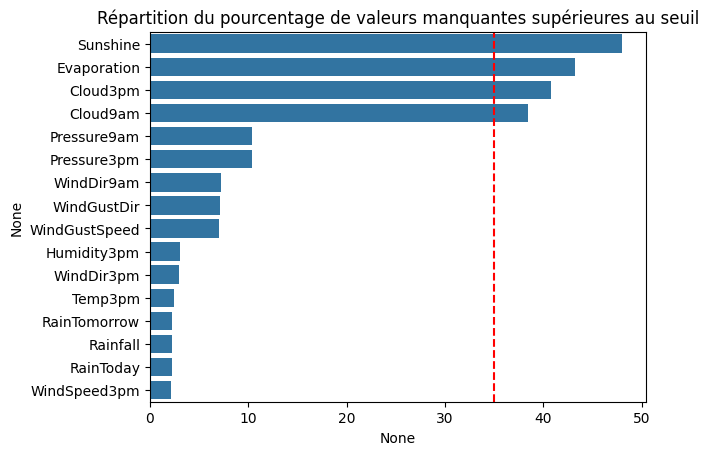

In [47]:
thr_view = 2

filtered = var_nan[var_nan.values > thr_view]
ax = sns.barplot(x = filtered, y = filtered.index, orient = 'h')
ax.set_title(f"Répartition du pourcentage de valeurs manquantes supérieures au seuil")

thr = 35
ax.axvline(x= thr, color='r', linestyle='--', label = f"Seuil de {thr}")

In [48]:
# Calcul du pourcentage de NaN par colonne et par Location
nan_by_location = (
    df.groupby('Location')
    .apply(lambda x: x.isnull().sum() * 100 / len(x))
    .T  # Transposer pour avoir les colonnes en lignes
)

# Trier les colonnes si souhaité, par exemple par ordre décroissant pour une location spécifique
# nan_by_location.sort_values(by='Albury', ascending=False)

nan_by_location


/tmp/ipykernel_35455/1373581569.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.isnull().sum() * 100 / len(x))


Location         Adelaide      Albany      Albury  AliceSprings  \
Date             0.000000    0.000000    0.000000      0.000000   
Location         0.000000    0.000000    0.000000      0.000000   
MinTemp          0.062637    2.072368    0.361842      0.032895   
MaxTemp          0.093956    1.776316    0.361842      0.065789   
Rainfall         3.194488    0.789474    0.953947      0.263158   
Evaporation     46.633260    9.539474  100.000000      7.072368   
Sunshine        44.597557   17.105263  100.000000     17.105263   
WindGustDir      0.814281  100.000000    1.052632      1.677632   
WindGustSpeed    0.814281  100.000000    1.052632      1.677632   
WindDir9am       8.581272    8.125000   17.269737      7.565789   
WindDir3pm       0.501096   25.756579    1.513158      0.131579   
WindSpeed9am     0.156593    2.006579    0.296053      0.065789   
WindSpeed3pm     0.156593   24.111842    0.361842      0.065789   
Humidity9am      0.156593    1.611842    0.296053      0.098684   
Humidity3pm      0.156593   23.552632    0.263158      0.164474   
Pressure9am      0.250548    0.822368    0.164474      0.032895   
Pressure3pm      0.219230    0.822368    0.263158      0.098684   
Cloud9am       100.000000    1.250000   57.598684     10.986842   
Cloud3pm       100.000000   23.388158   53.059211     11.875000   
Temp9am          0.156593    1.282895    0.296053      0.000000   
Temp3pm          0.125274   23.421053    0.263158      0.065789   
RainToday        3.194488    0.789474    0.953947      0.263158   
RainTomorrow     3.225806    0.789474    0.953947      0.296053   

Location       BadgerysCreek    Ballarat     Bendigo  Brisbane     Cairns  \
Date                0.000000    0.000000    0.000000  0.000000   0.000000   
Location            0.000000    0.000000    0.000000  0.000000   0.000000   
MinTemp             1.196411    0.032895    0.065789  0.281867   0.032895   
MaxTemp             0.963775    0.032895    0.164474  0.438459   0.000000   
Rainfall            2.691924    0.394737    0.197368  1.002192   1.710526   
Evaporation       100.000000  100.000000   61.019737  0.595052  12.171053   
Sunshine          100.000000  100.000000  100.000000  1.534607  15.657895   
WindGustDir         2.525756    1.019737    1.348684  1.284059   0.625000   
WindGustSpeed       2.525756    1.019737    1.315789  1.284059   0.592105   
WindDir9am         14.456630    2.993421    8.026316  2.192296   1.414474   
WindDir3pm          2.824859    0.592105    1.414474  1.064829   0.131579   
WindSpeed9am        1.628448    0.263158    0.131579  0.031319   0.032895   
WindSpeed3pm        1.595214    0.131579    0.131579  0.250548   0.032895   
Humidity9am         1.794616    0.690789    0.230263  0.125274   0.032895   
Humidity3pm         1.827850    0.230263    0.065789  0.469778   0.000000   
Pressure9am         5.583250    0.789474    0.493421  0.031319   0.032895   
Pressure3pm         5.749418    0.855263    0.328947  0.250548   0.000000   
Cloud9am          100.000000   17.960526   31.842105  0.031319   6.809211   
Cloud3pm          100.000000   34.473684   25.394737  0.062637   7.565789   
Temp9am             1.362579    0.394737    0.098684  0.125274   0.032895   
Temp3pm             1.462280    0.197368    0.065789  0.469778   0.000000   
RainToday           2.691924    0.394737    0.197368  1.002192   1.710526   
RainTomorrow        2.691924    0.394737    0.197368  1.002192   1.710526   

Location        Canberra  ...  Townsville  Tuggeranong       Uluru  \
Date            0.000000  ...    0.000000     0.000000    0.000000   
Location        0.000000  ...    0.000000     0.000000    0.000000   
MinTemp         0.174622  ...    0.065789     0.032906    2.217997   
MaxTemp         0.087311  ...    0.032895     0.131622    0.443599   
Rainfall        0.523865  ...    0.230263     1.349128    3.548796   
Evaporation    46.682189  ...    2.993421   100.000000  100.000000   
Sunshine       55.733411  ...   13.914474   100.0000

je supp les features avec trop de valeurs manquantes

In [49]:
columns_to_drop = list(var_nan[var_nan.values > thr].index)
df.drop(columns_to_drop, axis = 'columns', inplace=True)

In [50]:
# copie du dataframe
dfbis = df.copy()
var_nan = df.isnull().sum() * 100 / len(df)
var_nan.sort_values(ascending=False, inplace=True)
var_nan

Pressure9am      10.356799
Pressure3pm      10.331363
WindDir9am        7.263853
WindGustDir       7.098859
WindGustSpeed     7.055548
Humidity3pm       3.098446
WindDir3pm        2.906641
Temp3pm           2.481094
RainTomorrow      2.245978
Rainfall          2.241853
RainToday         2.241853
WindSpeed3pm      2.105046
Humidity9am       1.824557
Temp9am           1.214767
WindSpeed9am      1.214767
MinTemp           1.020899
MaxTemp           0.866905
Location          0.000000
Date              0.000000
dtype: float64

### Imputer les valeurs nulles (car pas bcp)

In [51]:
# Numériques
numeric_features = df.select_dtypes(include=['float', 'int']) # ne garde que les variables numériques
imputation = KNNImputer(missing_values=np.nan)
imputed = imputation.fit_transform(df.loc[:,numeric_features.columns].values)

df.loc[:,numeric_features.columns] = imputed

In [52]:
# Catégoriques
cat_features = df.select_dtypes(exclude=['float', 'int'])

imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent') # on a des variables catégorielles, mean ne peut pas marcher par exemple
imp = imp_mean.fit_transform(df.loc[:,cat_features.columns].values) # sur une varaible catégorielle

df.loc[:,cat_features.columns] = imp

In [53]:
# Pour vérifier
var_nan = df.isnull().sum() * 100 / len(df)
var_nan.sort_values(ascending=False, inplace=True)
var_nan

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

#### Effet de mon imputation

In [54]:
list(cat_features.columns)

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

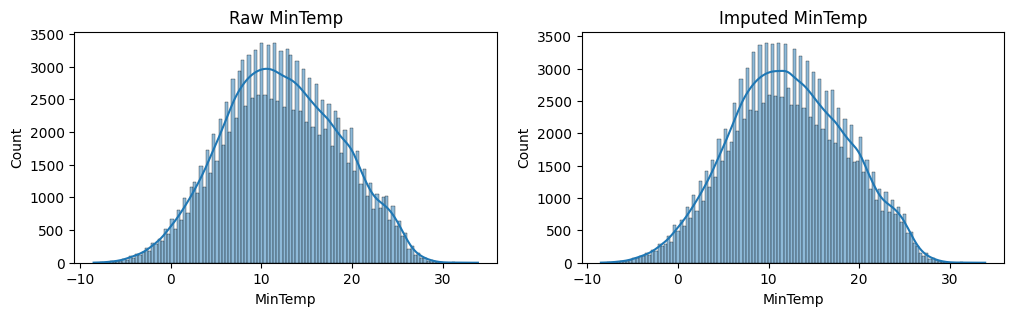

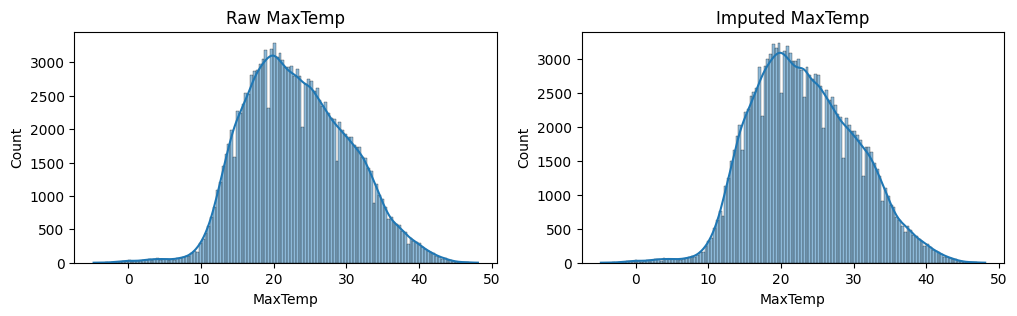

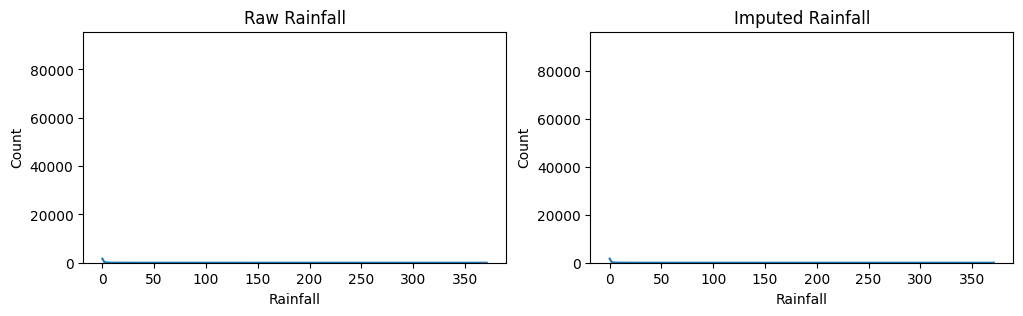

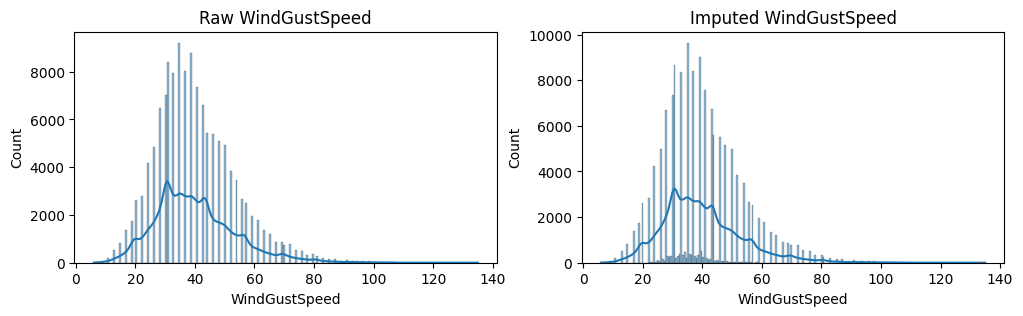

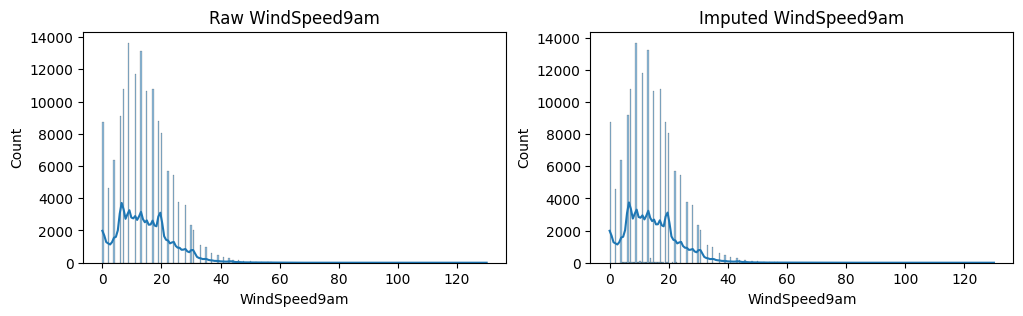

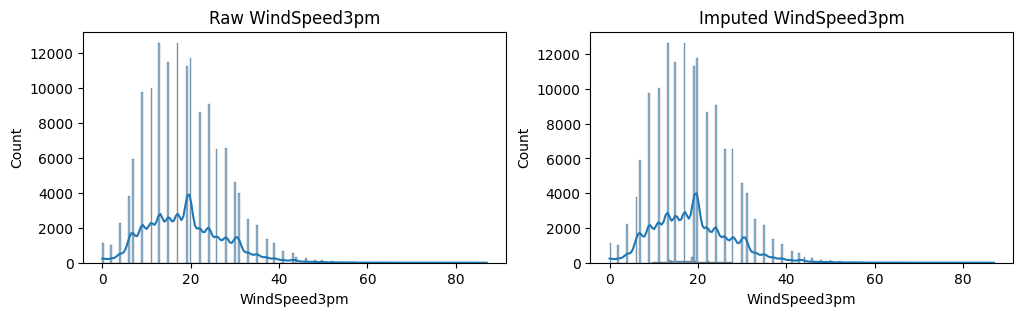

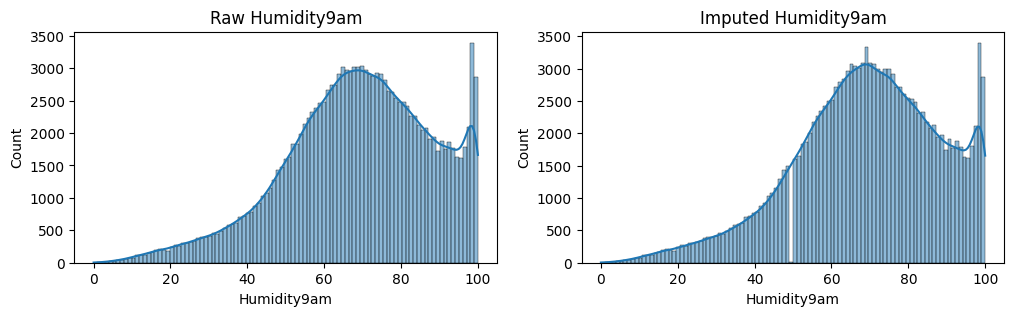

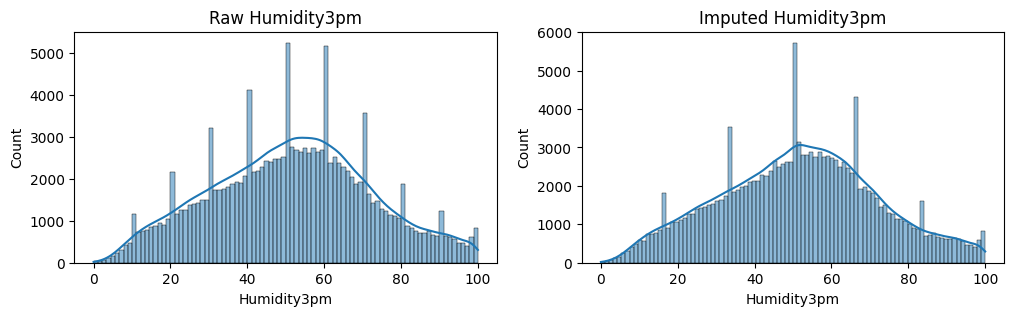

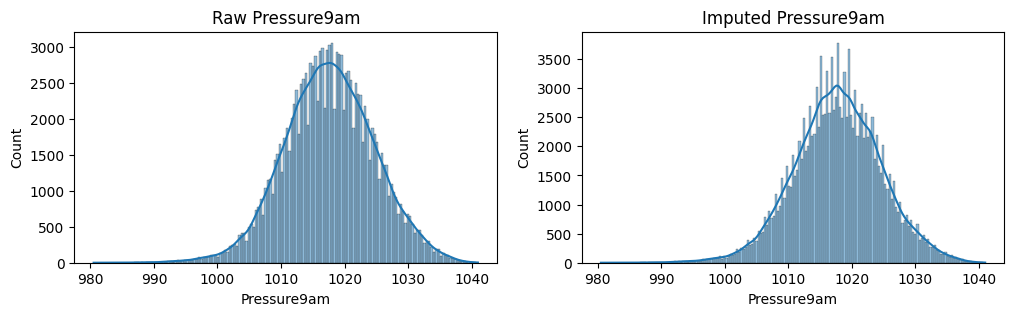

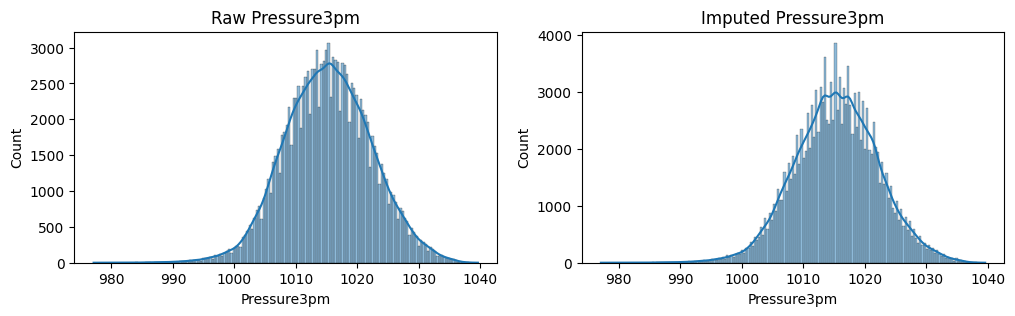

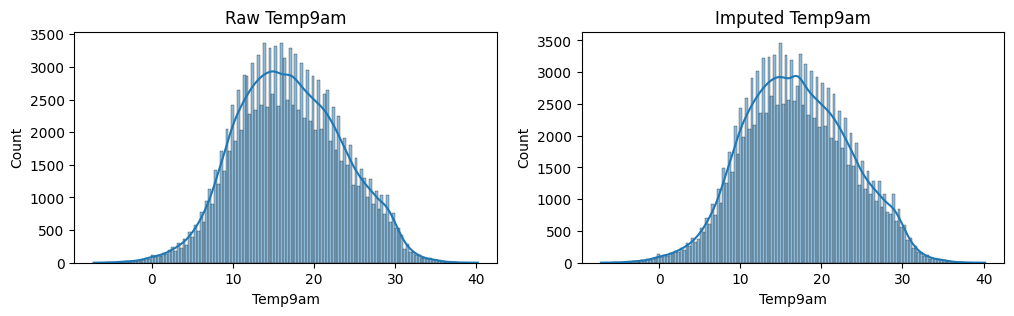

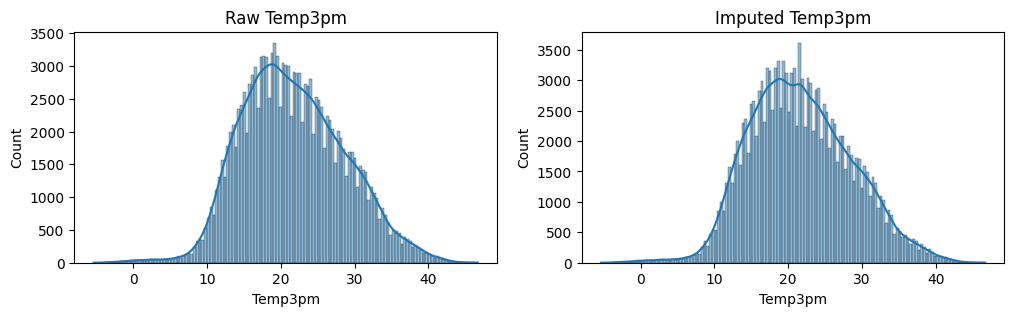

In [55]:
def compare_dist(feature):
    fig, axes = plt.subplots(1,2,figsize=(12,3))
    sns.histplot(raw_df.loc[:,feature],kde=True, ax=axes[0])
    axes[0].set_title(f"Raw {feature}");

    sns.histplot(df.loc[:,feature],kde=True, ax=axes[1])
    axes[1].set_title(f"Imputed {feature}")

# Sur les valeurs numériques
for i in list(numeric_features.columns) :
    compare_dist(i)

# Outliers

Critère de Tuckey (convention)

Text(0.5, 1.0, 'Boxplots utilisant le critère de Tukey')

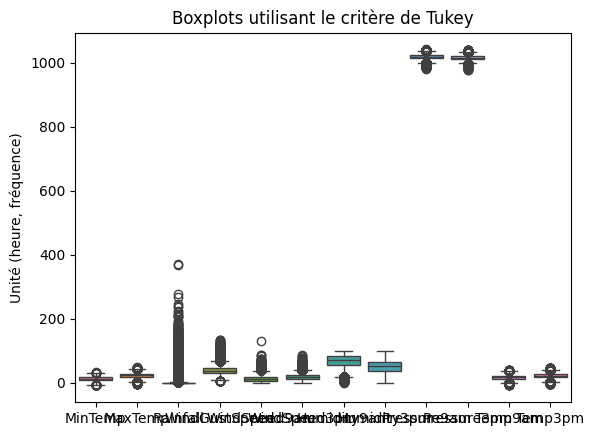

In [56]:
ax = sns.boxplot(data=df)
ax.set_ylabel("Unité (heure, fréquence)")
ax.set_title("Boxplots utilisant le critère de Tukey")

A priori, pas d'outliers  
Scatter Plot (pas utile ici)

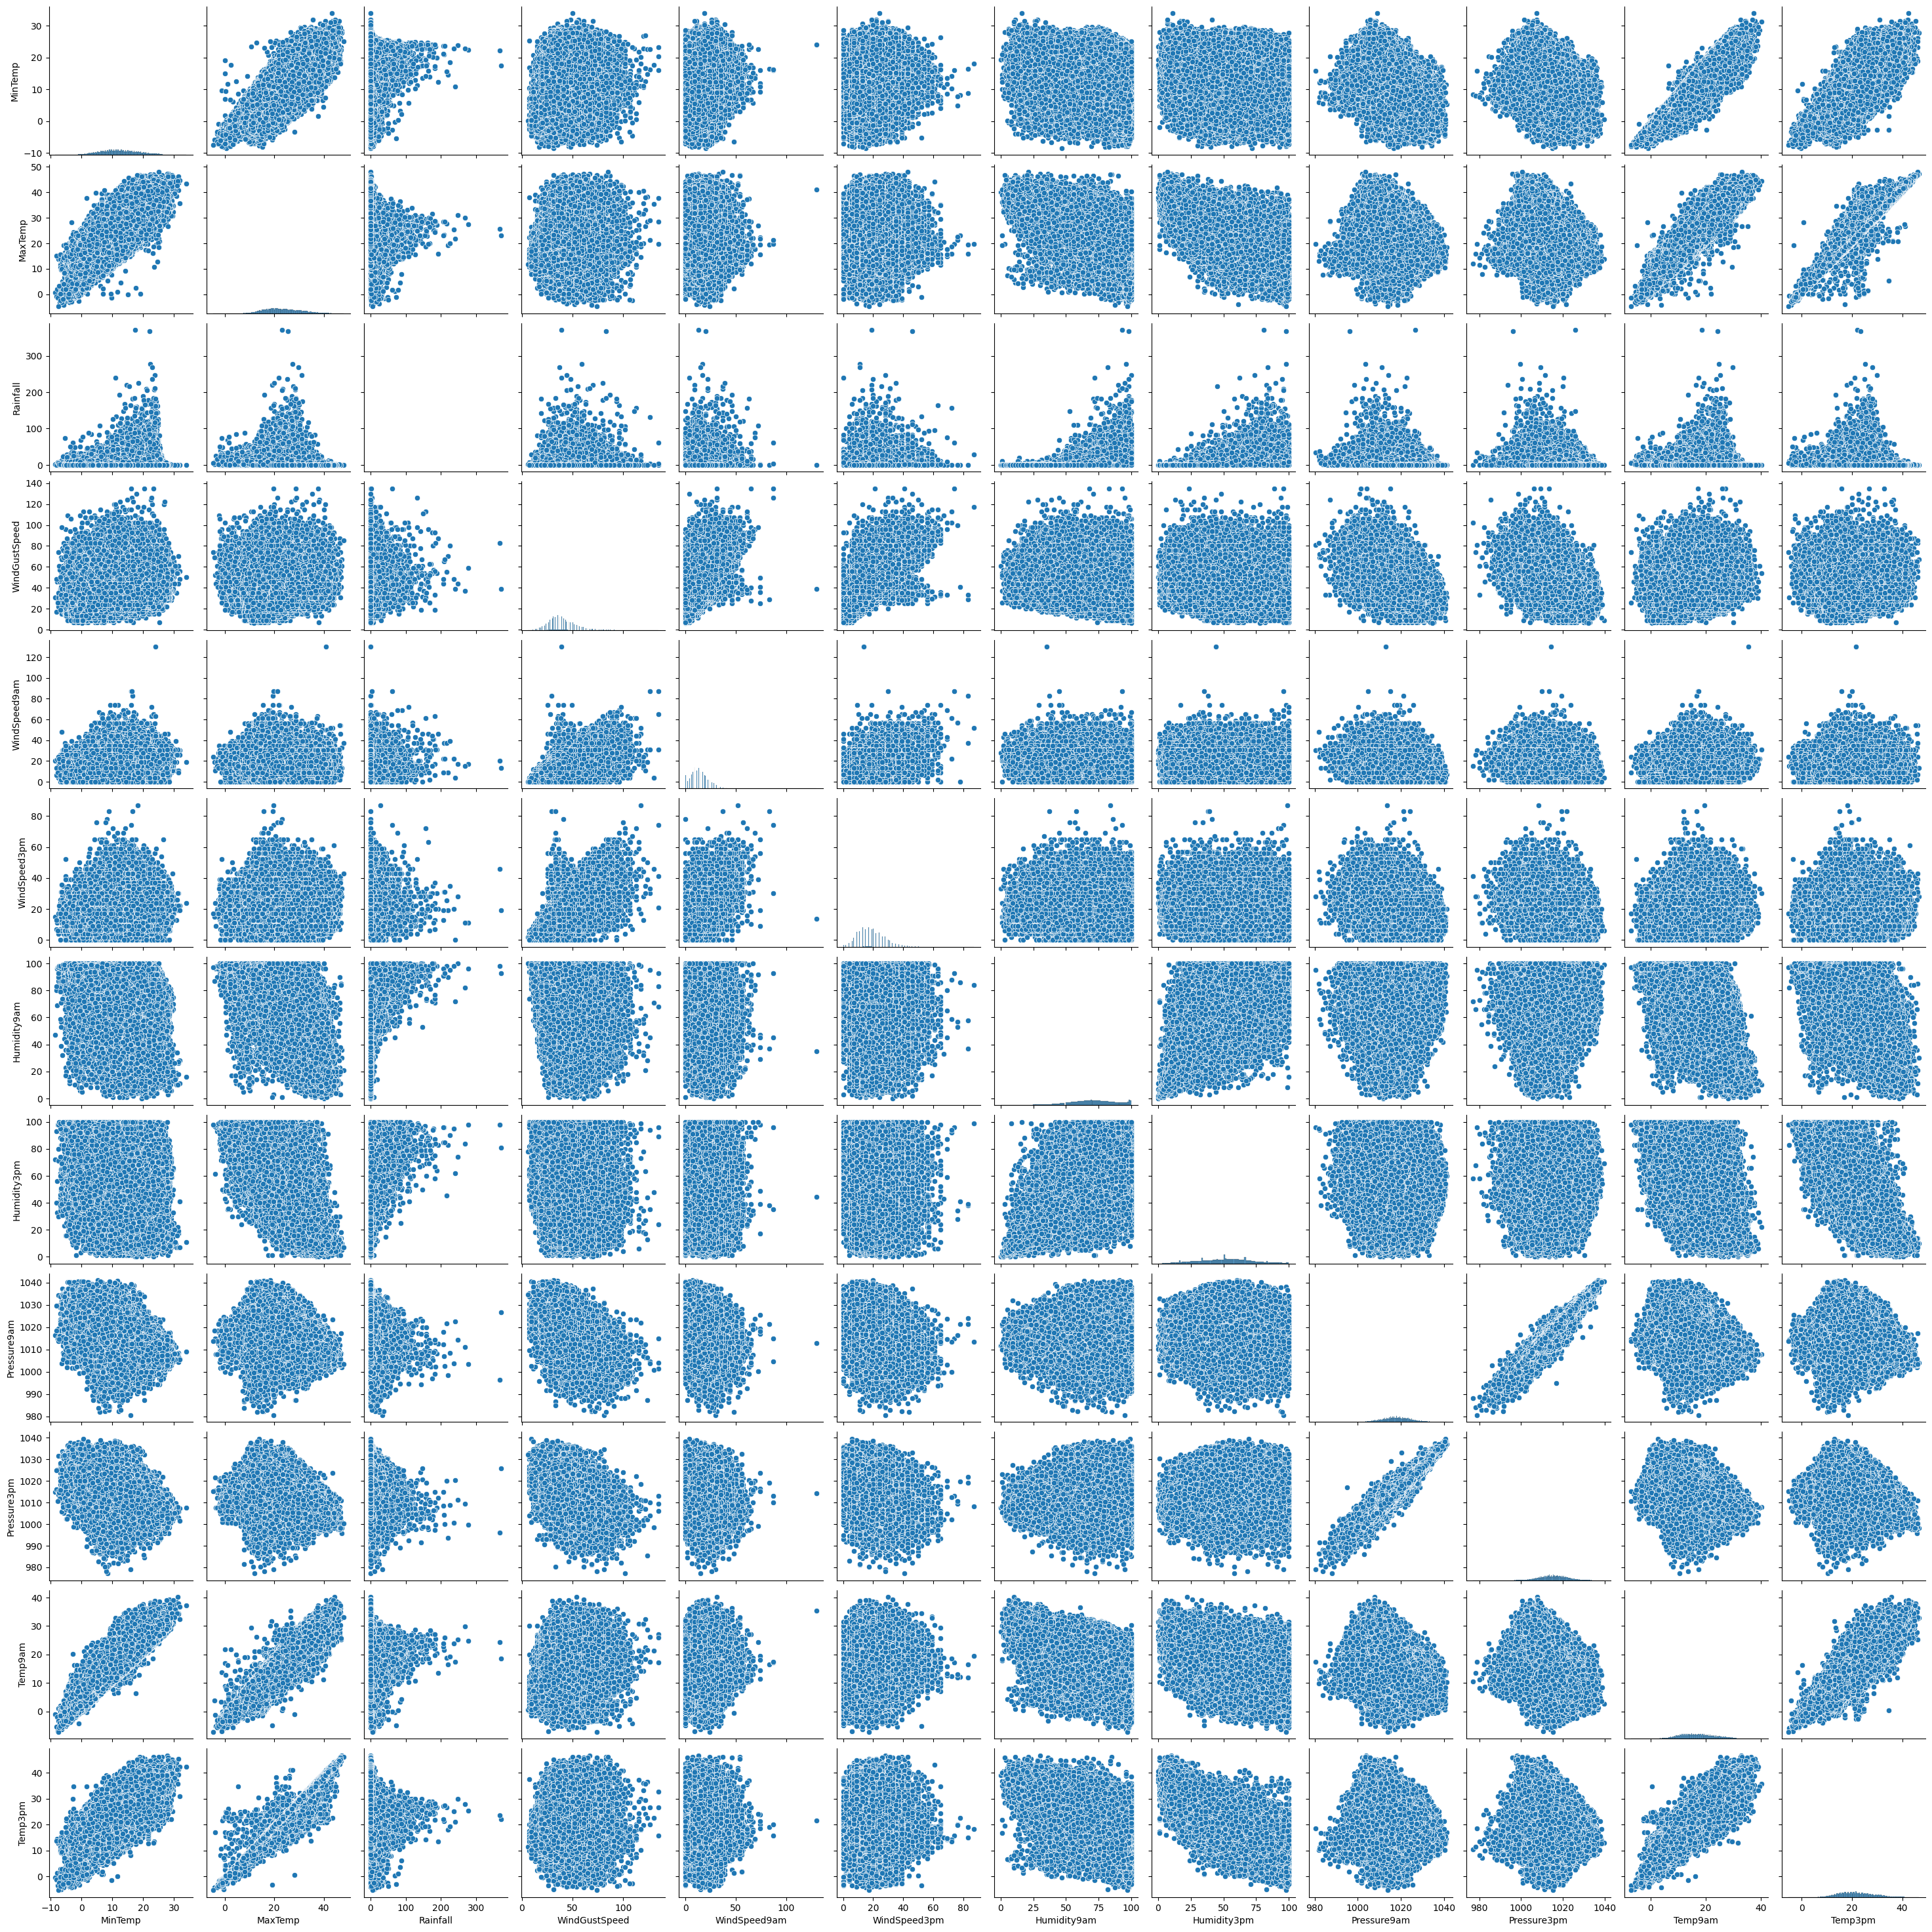

In [57]:
sns.pairplot(df)

# Encodage des valeurs catégorielles

Ma variable prédictive, pas dans les données d'entraînement : mon y

In [59]:
le = preprocessing.LabelEncoder()
y=le.fit_transform(df['RainTomorrow'])

y

array([0, 0, 0, ..., 0, 0, 0], shape=(145460,))

Mes autres variables catégorielles  
/!\ Ne sont pas ordinales 

In [60]:
df.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Date          145460 non-null  object
 1   Location      145460 non-null  object
 2   WindGustDir   145460 non-null  object
 3   WindDir9am    145460 non-null  object
 4   WindDir3pm    145460 non-null  object
 5   RainToday     145460 non-null  object
 6   RainTomorrow  145460 non-null  object
dtypes: object(7)
memory usage: 7.8+ MB


In [62]:
list(cat_features.columns)[-'Date']

TypeError: bad operand type for unary -: 'str'

In [18]:
enc = OneHotEncoder(handle_unknown='ignore')
encoded_features = enc.fit_transform(df.loc[:,['Stage_fear','Drained_after_socializing']]).toarray()


In [19]:
encoded_features

array([[1., 0., 1., 0.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       ...,
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [1., 0., 1., 0.]])

In [20]:
df_encoded = df.copy()
df_encoded.drop(['Stage_fear','Drained_after_socializing','Personality'], axis = 1)

# Création des noms de colonnes encodées
encoded_col_names = enc.get_feature_names_out(['Stage_fear', 'Drained_after_socializing'])

# Conversion en DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoded_col_names, index=df.index)

# Création de df_encoded en supprimant les colonnes originales
df_encoded = df.drop(['Stage_fear', 'Drained_after_socializing', 'Personality'], axis=1)

# Ajout des colonnes encodées
df_encoded = pd.concat([df_encoded, encoded_df], axis=1)

# Affichage
df_encoded.head()


Time_spent_Alone  Social_event_attendance  Going_outside  \
0               4.0                      4.0            6.0   
1               9.0                      0.0            0.0   
2               9.0                      1.0            2.0   
3               0.0                      6.0            7.0   
4               3.0                      9.0            4.0   

   Friends_circle_size  Post_frequency  Stage_fear_No  Stage_fear_Yes  \
0                 13.0             5.0            1.0             0.0   
1                  0.0             3.0            0.0             1.0   
2                  5.0             2.0            0.0             1.0   
3                 14.0             8.0            1.0             0.0   
4                  8.0             5.0            1.0             0.0   

   Drained_after_socializing_No  Drained_after_socializing_Yes  
0                           1.0                            0.0  
1                           0.0                            1.0  
2                           0.0                            1.0  
3                           1.0                            0.0  
4                           1.0                            0.0

# Scaling des données numériques

Je vérifie si mes classes sont fortement déséquilibrées ou non  
C'est ok

In [21]:
y.sum() # nb d'introvertis

1409

Je n'ai pas d'outliers, j'applique donc une standardisation classique

In [22]:
features_idx = df_encoded.loc[:,numeric_features.columns].index
X = df_encoded.loc[:,numeric_features.columns].values
original_data = X
original_df = pd.DataFrame(original_data, columns=numeric_features.columns)

standard_data = StandardScaler().fit_transform(X)
standard_df = pd.DataFrame(standard_data, columns=numeric_features.columns)

df_last = pd.concat([standard_df, encoded_df], axis=1)
df_last.head()

Time_spent_Alone  Social_event_attendance  Going_outside  \
0         -0.145028                 0.013630       1.337109   
1          1.295910                -1.365997      -1.337847   
2          1.295910                -1.021090      -0.446195   
3         -1.297778                 0.703443       1.782935   
4         -0.433215                 1.738163       0.445457   

   Friends_circle_size  Post_frequency  Stage_fear_No  Stage_fear_Yes  \
0             1.575105        0.491082            1.0             0.0   
1            -1.468350       -0.193698            0.0             1.0   
2            -0.297790       -0.536088            0.0             1.0   
3             1.809217        1.518251            1.0             0.0   
4             0.404545        0.491082            1.0             0.0   

   Drained_after_socializing_No  Drained_after_socializing_Yes  
0                           1.0                            0.0  
1                           0.0                            1.0  
2                           0.0                            1.0  
3                           1.0                            0.0  
4                           1.0                            0.0

# Voyons si certaines variables sont corrélées 

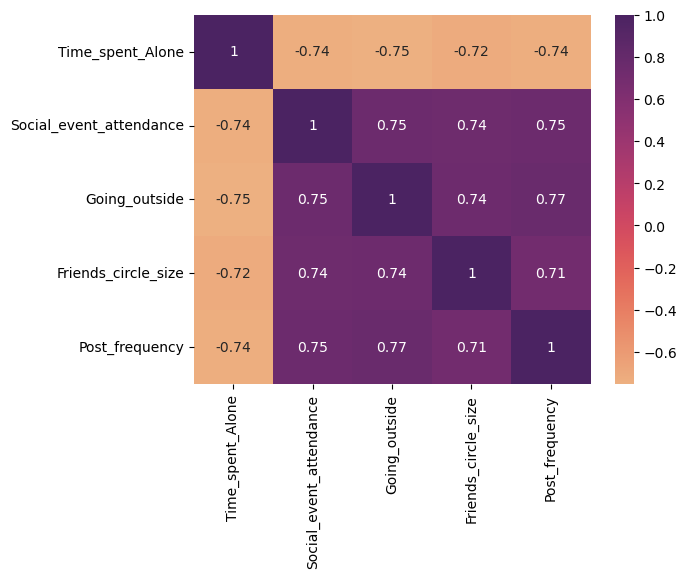

In [23]:
sns.heatmap(df_last.loc[:,numeric_features.columns].corr(), annot=True, cmap='flare')
plt.show()

# Faisons une ACP

In [24]:
# PCA complète
pca = PCA()
X_pca = pca.fit_transform(df_last)

# Créer les noms des composantes
pc_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]

# Construire le DataFrame avec toutes les composantes + species
df_pca_full = pd.DataFrame(X_pca, columns=pc_names)
df_pca_full['Personality'] = y

# Ajouter les variances expliquées (en %)
explained_variance = pca.explained_variance_ratio_
variance_df = pd.DataFrame({
    "PC": pc_names,
    "Explained Variance (%)": explained_variance * 100
})

# Afficher les variances expliquées
display(variance_df)

PC  Explained Variance (%)
0  PC1            8.120765e+01
1  PC2            4.935306e+00
2  PC3            4.480503e+00
3  PC4            4.193794e+00
4  PC5            3.699441e+00
5  PC6            1.121833e+00
6  PC7            3.614709e-01
7  PC8            1.876819e-30
8  PC9            3.842548e-32

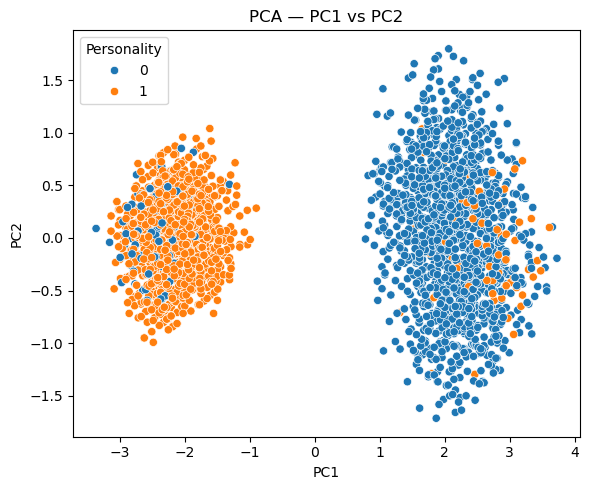

In [25]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=df_pca_full, x='PC1', y='PC2', hue='Personality')
plt.title("PCA — PC1 vs PC2")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()


# Pipeline pour standardiser et réaliser une classification KNN

In [26]:
pipeline = make_pipeline(StandardScaler(),KNeighborsClassifier()) # On aurait pu prendre une régression logistique, plus simple et binaire
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
pipeline.fit(X_train,y_train)
pipeline.score(X_test,y_test)

0.9195402298850575

In [27]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [30]:
shap.initjs()

In [31]:
explainer = shap.KernelExplainer(pipeline.predict_proba, X_train)
shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value[0], shap_values[..., 0], X_test)

Using 1943 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/957 [00:00<?, ?it/s]